In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
Xs, Ys = datasets.load_diabetes(return_X_y=True)

In [4]:
# error for the output of GD
def err_func1(A, x, b):
    return (np.linalg.norm(A @ x - b) ** 2)
# error for the while loop of GD
def err_func2(A, x, b):
    return 2 * np.linalg.norm((A.T @ A) @ x - A.T @ b)**2

# errir for the output normalized (divised by number of rows)
def err_func3(A, x, b):
    return (np.linalg.norm(A @ x - b) ** 2)/A.shape[0]

In [5]:
def gradient_descent(A, b, delta, eps, errFunc):
    x0 = A[np.random.randint(0,A.shape[0])]
    xk = x0
    xks = []
    err = errFunc(A,xk,b)
    while err > delta:
        grad = (A.T @ A) @ xk - A.T @ b
        xk = xk - 2*eps * grad
        err = errFunc(A,xk,b)
        xks.append(xk)
    
    return xks

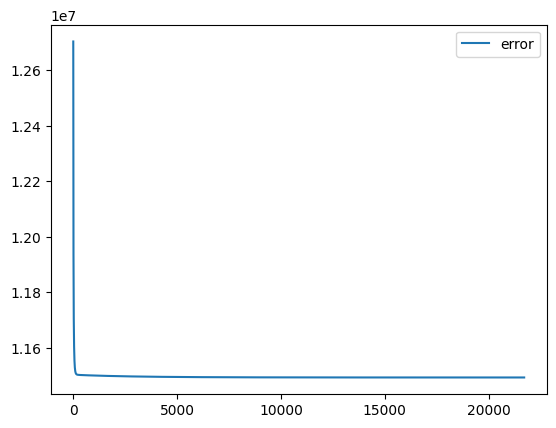

In [6]:
# Ex1
eps = 1e-2
delta = 1e-1
xks = gradient_descent(Xs, Ys, delta, eps, err_func2)
errs = [err_func1(Xs, xk, Ys) for xk in xks]
plt.plot(errs, label='error')
plt.legend()
plt.show()

In [7]:
# Ex2
def Ex2(Xs, Ys, train_size=0.8, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, train_size=0.8, test_size=0.2)
    eps = 1e-2
    delta = 1e-1
    xks = gradient_descent(x_train, y_train, delta, eps, err_func2)
    
    train_err = [err_func3(x_train, xk, y_train) for xk in xks]
    test_err = [err_func3(x_test, xk, y_test) for xk in xks]
    
    return [xks, train_err, test_err]



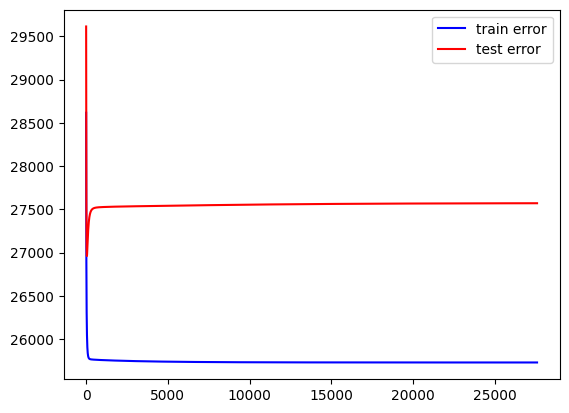

In [16]:
# EX2
xks, train_err, test_err = Ex2(Xs, Ys)

plt.plot(train_err,'b', label='train error')
plt.plot(test_err, 'r', label='test error')
plt.legend()
plt.show()

In [9]:
# Ex3
train_err, test_err = [], []
for i in range(10):
    xks, cur_train, cur_test = Ex2(Xs, Ys)
    train_err.append(cur_train[-1])
    test_err.append(cur_test[-1])
    
    avg_train_err = np.average(train_err)
    avg_test_err = np.average(test_err)
    
    min_train_err = np.min(train_err)
    min_test_err = np.min(test_err)


In [10]:
def calculate_relative_error(x, x_hat):
    rel_err = abs(x-x_hat)/x
    return rel_err

In [11]:
# EX3 answers

print(f'average train error :{avg_train_err}, average test error :{avg_test_err}')
print(f'minimum train error :{min_train_err}, minimum test error :{min_test_err}')

avg_rel_err = calculate_relative_error(avg_train_err,avg_test_err)
min_rel_err = calculate_relative_error(min_train_err,min_test_err)

print(f'relative average : {avg_rel_err}')
print(f'relative minimum : {min_rel_err}')


average train error :26054.77730567765, average test error :26374.993723709405
minimum train error :24846.635856921395, minimum test error :24104.990051208722
relative average : 0.012290123007958962
relative minimum : 0.029848942528212588
